### Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [ ]:
data = pd.read_csv('train.csv')

### Top 5 rows

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Shape of the Data

In [ ]:
data.shape

(891, 12)

### Data description

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking null value

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3 style="color:red"> Observation: Age and Cabin have large number of null values </h3>

### Heat Map : Null values

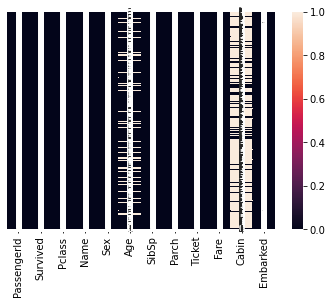

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(),yticklabels=False, annot=True)
plt.show()

## Exploratory Data Analysis

### What percentage of passengers survived ?

In [ ]:
data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<h3 style="color:red"> Observation: 61% of passengers have survived </h3>

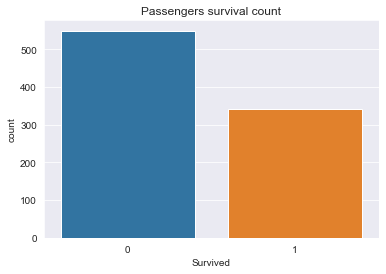

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")
sns.countplot(x='Survived',data=data)
plt.title("Passengers survival count")
plt.show()

## 1. Categorical Features

### 1.1. Gender Distribution

In [ ]:
data['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

<h3 style="color:red"> There are 65% male and 35% female passengers </h3>

In [ ]:
data.groupby(['Sex'])['Survived'].aggregate('mean').reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


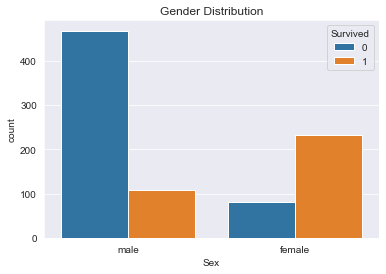

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")
sns.countplot(x='Sex',hue='Survived',data=data)
plt.title("Gender Distribution")
plt.show()

<h3> Observation: </h3><br>
    
    The chance of survival of female is more than that of man.
    74% female had survived but only 18% men were able to survive.

### 1.2. What are the different tickets class ?

In [ ]:
data['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

<h3 style="color:red"> Observation: Most of the tickets are from the third class </h3>

In [ ]:
data.groupby(['Pclass'])['Survived'].aggregate('mean').reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


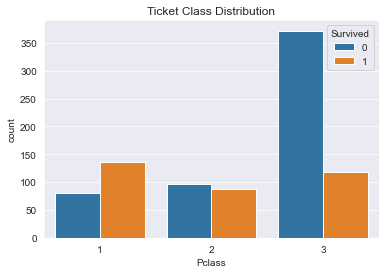

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.title("Ticket Class Distribution")
plt.show()

<h3>Observation:</h3><br>

    Class 1 passengers have more chances of survival than class 2 and class 3 Passengers.

### 1.3. Number of siblings/spouse abroaded with passengers ?

In [ ]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<h3 style='color:red'> Observation: Most of the passengers are independent traveller i.e. they are travelling alone. </h3>

In [ ]:
data.groupby(['SibSp'])['Survived'].aggregate('sum').reset_index()

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


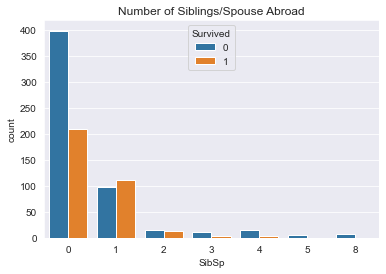

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='SibSp',hue='Survived',data=data)
plt.title("Number of Siblings/Spouse Abroad")
plt.show()

<h3> Observation: </h3><br>
    
    Most number of people who have survived are travelling alone.

### 1.4. Number of child/parent abroaded with passengers

In [ ]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<h3 style="color:red"> Observation: Most of the passengers are not travelling with their parents or children </h3>

In [ ]:
data.groupby(['Parch'])['Survived'].aggregate('sum').reset_index()

,Parch,Survived
0,0,233
1,1,65
2,2,40
3,3,3
4,4,0
5,5,1
6,6,0


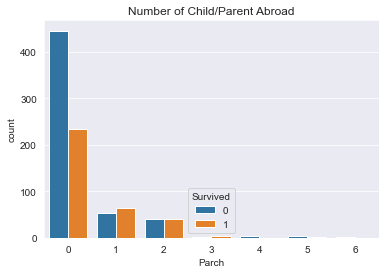

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Parch',hue='Survived',data=data)
plt.title("Number of Child/Parent Abroad")
plt.show()

<h3> Observation: </h3><br>
    
    Most number of passengers who have survived are alone travellers.

### 1.5. Distribution of people embarked at different ports

In [ ]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<h3 style="color:red"> Observation: Most number of people boarded at Southampton Port</h3>

In [ ]:
data.groupby(['Embarked'])['Survived'].aggregate('mean').reset_index()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


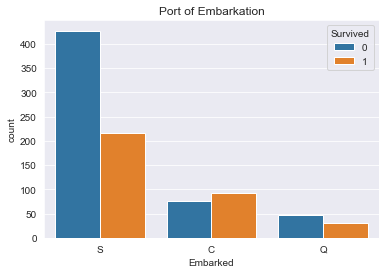

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked',hue='Survived', data=data)
plt.title("Port of Embarkation")
plt.show()

<h3> Observation: </h3><br>
    
    Most Percentage of passengers survived who boarded from Cherbourg Port.

## 2. Numerical Features

### 2.1. Age

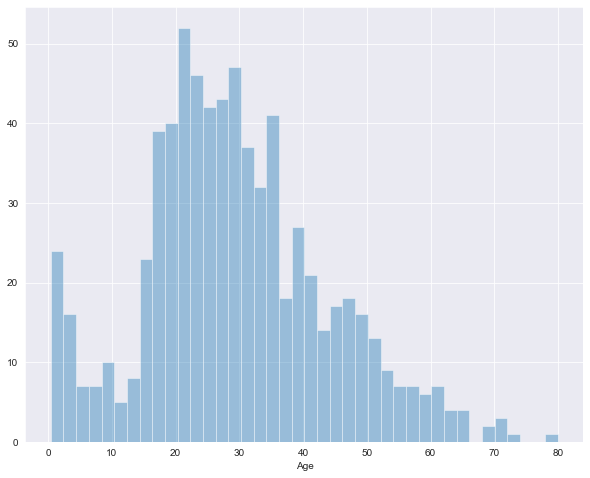

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Age'].dropna(),kde=False,bins=40) #kde-> kernel density estimation
plt.show()

<h3> Observation: </h3><br>
    
    Most number of passengers are between the age 20 to 22.

### 2.2. Fare

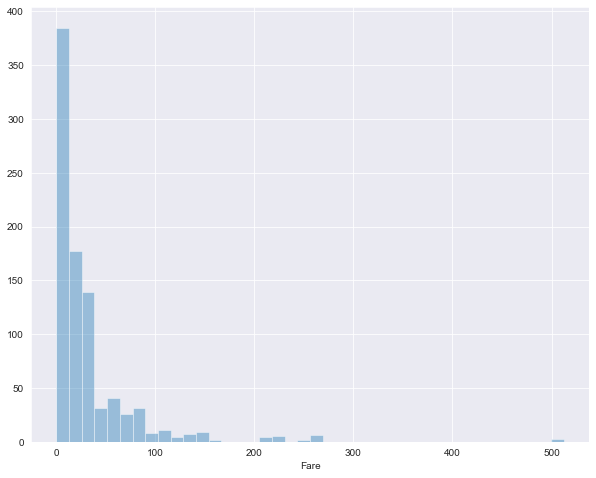

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Fare'],kde=False,bins=40)
plt.show()

<h3> Observation: </h3><br>
    
    Most of the passengers who are travelling have fare under 15$.

## 3. Handling the missing Values

### 3.1. Age

In [ ]:
age_mean = data['Age'].mean()

In [ ]:
data['Age'] = data['Age'].fillna(age_mean)

### 3.2. Cabin

In [ ]:
data.drop('Cabin',axis=1,inplace=True)

### 3.3. Embarked

In [ ]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

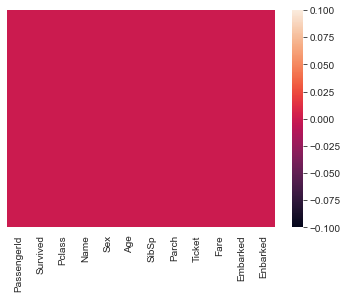

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()